# Basque case study: results
* vehicle stock sizing 
* vehicle stock aging
* technological shift

## Vehicle stock

In [1]:
# read data
import yaml
from ast import literal_eval
import pandas as pd 

# Read YAML file
with open('h_dict.yaml', 'r') as file:
    h_dict = yaml.safe_load(file)

h_dict = {eval(key): value for key, value in h_dict.items()}

with open('f_dict.yaml', 'r') as file:
    f_dict = yaml.safe_load(file)

f_dict = {eval(key): value for key, value in f_dict.items()}



In [2]:
print(len(h_dict.keys()))
# print((1, 0, (1, 1), 1) in h_dict)

# Convert keys of f_dict back to tuples

# Print the updated f_dict
# print(h_dict)

533200


In [3]:
with open('temp_data/transport_data_years_v7.yaml', 'r') as file:
    input_data = yaml.safe_load(file)
print(input_data)

nodes = input_data['Node']
odpairs = input_data['Odpair']
odpairs_dict = {odpair["id"]: odpair for odpair in odpairs}
print(odpairs_dict)
print(nodes)

{'Edge': [{'from': 'ES130', 'id': 0, 'length': 154000, 'name': 'ES130_ES412', 'to': 'ES412'}, {'from': 'ES130', 'id': 1, 'length': 103000, 'name': 'ES130_ES213', 'to': 'ES213'}, {'from': 'ES213', 'id': 2, 'length': 153000, 'name': 'ES213_ES412', 'to': 'ES412'}, {'from': 'ES213', 'id': 3, 'length': 63000, 'name': 'ES213_ES211', 'to': 'ES211'}, {'from': 'ES213', 'id': 4, 'length': 97000, 'name': 'ES213_ES212', 'to': 'ES212'}, {'from': 'ES412', 'id': 5, 'length': 114000, 'name': 'ES412_ES211', 'to': 'ES211'}, {'from': 'ES412', 'id': 6, 'length': 115000, 'name': 'ES412_ES230', 'to': 'ES230'}, {'from': 'ES211', 'id': 7, 'length': 99000, 'name': 'ES211_ES212', 'to': 'ES212'}, {'from': 'ES211', 'id': 8, 'length': 98000, 'name': 'ES211_ES220', 'to': 'ES220'}, {'from': 'ES211', 'id': 9, 'length': 96000, 'name': 'ES211_ES230', 'to': 'ES230'}, {'from': 'ES212', 'id': 10, 'length': 85000, 'name': 'ES212_ES220', 'to': 'ES220'}, {'from': 'ES220', 'id': 11, 'length': 89000, 'name': 'ES220_ES230', 'to

In [4]:
# making table for vehicle nodes
required_vehicles_init = {}
technology = input_data['Technology']
vehicles = input_data['Vehicletype']
sum_all = 0
print(odpairs)
for node in nodes:
    etis_code = node["name"]
    matching_set_ids = [odpair["id"] for odpair in odpairs if odpair.get("from") == etis_code]
    vehs = sum([float(h_dict[(2020, od_id, (v["id"], t["id"]), g)]) for od_id in matching_set_ids for g in range(2020-12, 2020+1) for v in vehicles for t in technology])
    
    required_vehicles_init[etis_code] = vehs
    sum_all += vehs
    # print(matching_set_ids, etis_code, vehs)
    print(etis_code, matching_set_ids, vehs)

print(sum_all)

[{'F': [12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705, 12650705], 'financial_status': 'upper_10', 'from': 'ES211', 'id': 0, 'path_id': 0, 'product': 'passenger', 'to': 'ES211', 'urban': True, 'vehicle_stock_init': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}, {'F': [10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.984798655, 10120563.98479865

KeyError: (2020, 207, (1, 1), 2008)

In [18]:
# loading the vehicle data 
filepath = "D:\save_spot\iDesignRES\estat_tran_r_vehst.tsv/estat_tran_r_vehst.tsv"

vehicle_stock = pd.read_csv(filepath, sep='\t')
print(vehicle_stock.head())

  freq,vehicle,unit,geo\TIME_PERIOD 1990  1991  1992  1993  1994  1995  1996   \
0                   A,BUS_TOT,NR,AL    :     :     :     :     :     :     :    
1                  A,BUS_TOT,NR,AL0    :     :     :     :     :     :     :    
2                 A,BUS_TOT,NR,AL01    :     :     :     :     :     :     :    
3                 A,BUS_TOT,NR,AL02    :     :     :     :     :     :     :    
4                 A,BUS_TOT,NR,AL03    :     :     :     :     :     :     :    

  1997  1998   ... 2013  2014  2015  2016   2017   2018   2019   2020   2021   \
0    :     :   ...    :     :     :     :   6583   7146   7535   7627   7867    
1    :     :   ...    :     :     :     :   6583   7146   7535   7627   7867    
2    :     :   ...    :     :     :     :      :      :      :   2179   2397    
3    :     :   ...    :     :     :     :      :      :      :   3283   3198    
4    :     :   ...    :     :     :     :      :      :      :   2165   2272    

   2022   
0  8211   
1  8

## Results visualization

In [19]:
# adoption of BEVs throughout the demographic/urban allocation for different snapshots

# categorize based on the financial status 
financial_status = input_data['FinancialStatus']

paths = input_data['Path']

print(vehicles)
year_of_interest = 2020

def create_info_dict_vehicle_ownership(year_of_interest, vehicle_ids=[] ,after_vehicle_type=False):
    classification_vehicle_owner_ship = {}
    if after_vehicle_type:
        vehicles_to_consider = vehicle_ids  
    else:
        vehicles_to_consider = vehicles

    for fs in financial_status:
        for urban in [True, False]:
            fs_name = fs["name"]
            matching_set_ids = [odpair["id"] for odpair in odpairs if odpair.get("financial_status") == fs_name and odpair.get("urban") == urban]
            paths_dict = {odpair["id"]: [odpair["path_id"]] for odpair in odpairs if odpair.get("financial_status") == fs_name and odpair.get("urban") == urban}
            for veh in vehicles_to_consider:
                for tech in technology:
                    tech_name = tech["id"]
                    vehs = sum([float(h_dict[(year_of_interest, od_id, (veh["id"], tech["id"]), g)]) for od_id in matching_set_ids for g in range(2020-12, year_of_interest+1)])
                    trips = sum([float(f_dict[(year_of_interest, (1, od_id, p), (veh["id"], tech["id"]), g)]) for od_id in matching_set_ids for p in paths_dict[od_id] for g in range(2020-12, year_of_interest+1)])
                    classification_vehicle_owner_ship[(urban, fs_name, veh["name"], tech_name)] = vehs
    return classification_vehicle_owner_ship


[{'id': 1, 'mode': 'road', 'name': 'passenger car'}]


1
1
1
1


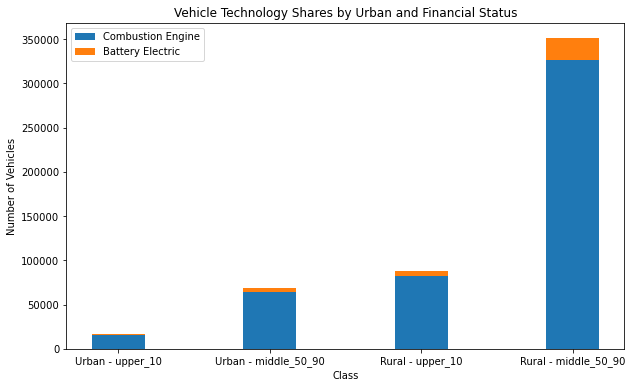

1
1
1
1


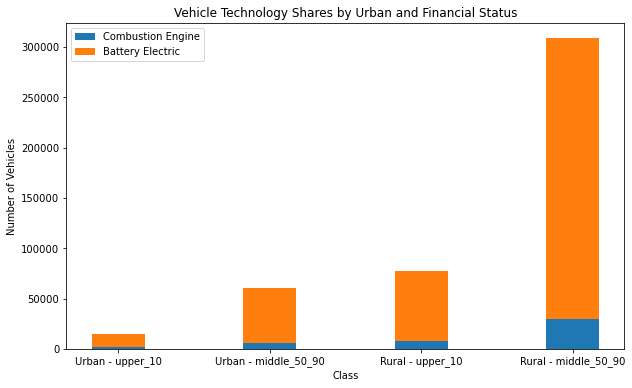

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vehicle_ownership(year_of_interest, vehicle_id=[] ,after_vehicle_type=False):
    classification_vehicle_owner_ship = create_info_dict_vehicle_ownership(year_of_interest, vehicle_id, after_vehicle_type)
    # Extract data for plotting
    urban_status = ['Urban', 'Rural']
    financial_status = ['upper_10', 'middle_50_90']
    vehicle_types = ['passenger car']
    tech_types = ['combustion engine', 'battery electric']

    # Prepare data for plotting
    data = []
    for urban in [True, False]:
        for fs in financial_status:
            row = []
            for tech in tech_types:
                key = (urban, fs, 'passenger car', tech_types.index(tech) + 1)
                row.append(classification_vehicle_owner_ship.get(key, 0))
            data.append(row)

    data = np.array(data)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    index = np.arange(len(financial_status) * len(urban_status))

    bar1 = ax.bar(index, data[:, 0], bar_width, label='Combustion Engine')
    bar2 = ax.bar(index, data[:, 1], bar_width, bottom=data[:, 0], label='Battery Electric')

    ax.set_xlabel('Class')
    ax.set_ylabel('Number of Vehicles')
    ax.set_title('Vehicle Technology Shares by Urban and Financial Status')
    ax.set_xticks(index)
    ax.set_xticklabels([f'{u} - {fs}' for u in urban_status for fs in financial_status])
    ax.legend()

    plt.show()

plot_vehicle_ownership(2020)
plot_vehicle_ownership(2030)

In [7]:
# spatial allocation of BEV adoption



In [8]:
# temporal allocation of BEV adoption